# **Import Python Libraries and Download Dataset** #
1. Numpy, Matplotlib, Standard Python Libraries
2. Download Clean and Noise Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q /content/drive/MyDrive/CW1.zip -d cw1

replace cw1/co553_DTcoursework_V21_22_70050.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cw1/wifi_db/clean_dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cw1/wifi_db/noisy_dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cw1/requirements.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
clean = np.loadtxt('/content/cw1/wifi_db/clean_dataset.txt')
noise = np.loadtxt('/content/cw1/wifi_db/noisy_dataset.txt')
#small = np.loadtxt('/content/small.txt')

# **Decision Tree Definition Fuction**#

1.  Entropy
2.  Remainder
3.  Gain
4.  best_feature_gain
5.  find_split
6.  decision_tree_learning

In [ ]:
def H(dataset):
    """ Entropy
            dataset: [X, y]
    """
    k, c = np.unique(dataset[:, -1], return_counts=True)
    n = len(dataset)
    pk = c/n
    return (-1) * np.sum(pk * np.log2(pk))


def remainder(l_dataset, r_dataset):
    """ Remainder
            l_dataset, r_dataset: [X, y]
    """
    l_num = len(l_dataset)
    r_num = len(r_dataset)
    return l_num/(l_num+r_num)*H(l_dataset) + r_num/(l_num+r_num)*H(r_dataset)


def gain(dataset, l_dataset, r_dataset):
    """ Gain
            dataset, l_dataset, r_dataset: [X, y]
    """
    return H(dataset) - remainder(l_dataset, r_dataset)


def best_feature_gain(dataset, feature_ind):
    """ Find the best split for a given feature
            output a dictionary containing
            - the max gain: float
            - splitting value: float S
            - left data: subset where X_feature <= S
            - right data: subset where X_feature > S
    """
    sort_by_feature = dataset[np.argsort(dataset[:,feature_ind])]
    #2 consider split feature values into unique values
    feature_vals = np.unique(sort_by_feature[:, feature_ind])[:-1]

    output = {'max_gain': -float('inf'), 'split_val':0, 'l_data':[], 'r_data':[]}
    for val in feature_vals:

        left_data = sort_by_feature[np.where(sort_by_feature[:,feature_ind] <= val)]
        right_data = sort_by_feature[np.where(sort_by_feature[:,feature_ind] > val)]

        each_gain = gain(sort_by_feature, left_data, right_data)
        if each_gain > output['max_gain']:
            output['max_gain'] = each_gain
            output['split_val'] = val
            output['l_data'] = left_data
            output['r_data'] = right_data
    return output


def find_split(dataset):

    max_gain = -float('inf')

    output = {'feature_ind':0, 'split_val':0, 'l_data':[], 'r_data':[]}
    for feature_ind in range(np.shape(dataset)[1]-1):
        feature_gain, split_val, l_data, r_data = best_feature_gain(dataset, feature_ind).values()

        if feature_gain > max_gain:
            max_gain = feature_gain
            output['feature_ind'] = feature_ind
            output['split_val'] = split_val
            output['l_data'] = l_data
            output['r_data'] = r_data

    return output


def decision_tree_learning(dataset, depth=0):
    #Pure node with label = label
    if len(np.unique(dataset[:,-1])) == 1:
        label = dataset[0][-1]
        node = {'label': int(label), 'num_data': int(len(dataset))}
        return node, depth

    feature_ind, split_val, l_data, r_data = find_split(dataset).values()

    l_node, l_depth = decision_tree_learning(l_data, depth+1)
    r_node, r_depth = decision_tree_learning(r_data, depth+1)

    node = {'feature_ind': feature_ind, 'split_val': split_val, 'l_node': l_node, 'r_node': r_node}

    return node, max(l_depth, r_depth)


In [ ]:
# best_feature_gain(clean, 0)
dataset = clean
sort_by_feature = dataset[np.argsort(dataset[:,0])]
left_data = sort_by_feature[np.where(sort_by_feature[:,0] <= -74)]
right_data = sort_by_feature[np.where(sort_by_feature[:,0] > -74)]
H(left_data)
print(H(left_data))
print("----")
H(right_data)
print(H(right_data))
gain(dataset, left_data, right_data)

-0.0
----
1.9999994582671772


0.0010005414619562725

## Test

In [ ]:
def gain2(s_all, s_left, s_right):
    return entropy(s_all) - remainder(s_left, s_right)


def entropy(dataset):
    num_label = int(dataset[-1][-1])
    entropy = 0
    for k in range(1, num_label + 1):
        num_k = 0
        num_data = dataset.shape[0]
        for i in range(num_data):
            if dataset[i][-1] == k:
                num_k += 1
        pk = num_k / num_data
        entropy += -pk * np.log2(pk)
    return entropy


def remainder2(s_left, s_right):
    num_left = s_left.shape[1]
    num_right = s_right.shape[1]
    return (num_left) * entropy(s_left) / (num_left + num_right) + (num_right) * entropy(s_right) / (num_left + num_right)

In [ ]:
gain2(clean,clean[0:100], clean[100:])

0.10591493339411562

# **! Bonus Part: The Decision Tree Visualisation Fuction** #

In [ ]:
import random # The random is from standard Python libraries
decision_tree, depth = decision_tree_learning(clean, 0)
# Create a function to generate a random color, ensuring contrast with white background
def generate_random_line_color(previous_colors):
    while True:
        line_color = "#{:02x}{:02x}{:02x}".format(random.randint(75, 255), random.randint(0,175), random.randint(0,175))
        if line_color not in previous_colors:
            return line_color

# Create a function to format node text
def format_node_text(node_text):
    parts = node_text.split(' ')
    if len(parts) == 2:
        first_number = parts[0]
        second_number = parts[1]
        formatted_text = '[x{} > {}]'.format(first_number, second_number)
        return formatted_text
    else:
        return node_text

# Create a function to plot the decision tree recursively
def plot_tree(tree, parent_x, parent_y, level, spacing, parent_colors=None):
    if (level < 6):
      size = 30
    if (level == 6):
      size = 15
    if (level >6):
      size = 10
    lr = []
    lr.append(tree['l_node'])
    lr.append(tree['r_node'])
    children = lr
    num_children = len(children)
    if (level == 6):
      spacing = 22
    if (level == 7):
      spacing = 18
    if (level == 8):
      spacing = 13
    if (level == 10):
      spacing = 1.8
    if (level != 10):
      spacing = max(spacing / 1.8, 2)
    lr = [tree['l_node'], tree['r_node']]
    num_children = len(lr)
    x = parent_x - spacing / num_children
    y = parent_y - 1  # Adjust this value to control vertical spacing

    # Initialize a list for child colors if it's None
    if parent_colors is None:
        parent_colors = []

    # Generate a random dark line color for the current set of children
    line_color = generate_random_line_color(parent_colors)
    for child in lr:
        if len(child) == 1:
            # Plot the edge with the line_color
            plt.plot([parent_x, x], [parent_y, y], '-o', color=line_color, lw=2)
            # Format node text
            text = format_node_text('lf:' + str(child['label']))
            # Plot the child node with a purple border and white background
            plt.text(x, y, text, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='purple', lw=2), color='blue', fontsize=size)
        if len(child) == 4:
            # Plot the edge with the line_color
            plt.plot([parent_x, x], [parent_y, y], '-o', color=line_color, lw=2)
            # Format node text
            text = format_node_text(str(child['feature_ind']) + ' ' + str(child['split_val']))
            # Plot the child node with a purple border and white background
            plt.text(x, y, text, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='purple', lw=2), color='blue', fontsize=size)
            child_colors = parent_colors + [line_color]
            plot_tree(child, x, y, level + 1, spacing, child_colors)
        x += spacing  # Adjust this value to control horizontal spacing

# Initialize the figure and plot the root node
plt.figure(figsize=(130, 90))
root_node_text = format_node_text(str(decision_tree['feature_ind']) + ' ' + str(decision_tree['split_val']))
plt.text(0, 0, root_node_text, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='purple', lw=2), color='blue', fontsize=40)

# Define the horizontal spacing between nodes
horizontal_spacing = 200

# Plot the tree
plot_tree(decision_tree, 0, 0, 1, horizontal_spacing)

# Set axis properties and display the tree
plt.axis('off')
plt.show()

# **Evaluation** #
1. k_fold_cross_validation
2. predict
3. confusion_matrix

In [ ]:
def k_fold_cross_validation(dataset, k=10):
    np.random.shuffle(dataset)
    # k = 10  # 10-fold
    k_sample_count = dataset.shape[0] // k  # How many rows per fold (using divider here)

    output = {}
    # Split the dataset according to the k-fold
    for fold in range(k):
        validation_begin = k_sample_count * fold
        validation_end = k_sample_count * (fold + 1)

        validation_data = dataset[validation_begin:validation_end][:,:-1]
        validation_label = dataset[validation_begin:validation_end][:,-1]

        # np.vstack() is used to stack arrays vertically (row-wise) to make a single array
        train_data = np.vstack([
            dataset[:validation_begin],
            dataset[validation_end:]
        ])

        output[fold] = {'train':train_data, 'validation':validation_data, 'validation_label':validation_label}

    return output

In [ ]:
def predict(X, trained_tree):
    if 'label' in trained_tree:
        y_inds = X[:,-1]
        y_pred = trained_tree['label'] * np.ones(len(y_inds))
        y_pair = np.stack((y_inds, y_pred), axis=1)
        return y_pair
    else:
        feature_ind = trained_tree['feature_ind']
        split_val = trained_tree['split_val']
        l_node = trained_tree['l_node']
        r_node = trained_tree['r_node']
        X_left = X[np.where(X[:,feature_ind] <= split_val)]
        X_right = X[np.where(X[:,feature_ind] > split_val)]
        y_pair_l = predict(X_left, l_node)
        y_pair_r = predict(X_right, r_node)
    return np.concatenate((y_pair_l, y_pair_r), axis=0)

In [ ]:
def confusion_matrix(test_X, trained_tree, true_label):
    # --> pred_label
    indecies = np.transpose(np.array([range(len(test_X))]))
    X_ind = np.hstack([test_X, indecies])
    # --> trained_tree: feature_ind of split, value of feature split, left tree, right tree, label:?
    y_pairs = predict(X_ind, trained_tree)
    y_indecies = np.argsort(y_pairs[:,0])
    y_pred = y_pairs[y_indecies][:,1]
    label_classes = np.unique(true_label)
    # print(y_pred)
    # print(true_label)
    confusion_mat = np.zeros((4,4))
    for target_label in label_classes:
        y_pred_target_label = y_pred[np.where(true_label==target_label)]
        for pred_label in label_classes:
            confusion_mat[int(target_label-1)][int(pred_label-1)] = np.sum([y_pred_target_label == pred_label])
    return confusion_mat


# **Evaluation Indicators Calculation** #
- Accuracy
- Precision and recall per class
- F1-score derived from the recall and precision rates per class

In [ ]:
def evaluation_indicator(confusion_matrix,count,**evaluation_indicators):
      evaluation_indicators['accuracy'][count,0]=np.sum(np.diag(confusion_matrix)) / np.sum(np.sum(confusion_matrix))
      print('Accuracy: {:.3f}'.format(evaluation_indicators['accuracy'][count,0]))

      for index in range(4):
        evaluation_indicators['precision'][count, index]= confusion_matrix[index, index]/confusion_matrix[:, index].sum()
        evaluation_indicators['recall'][count, index]= confusion_matrix[index, index]/confusion_matrix[index, :].sum()
        evaluation_indicators['f1_score'][count, index] = 2 * evaluation_indicators['precision'][count, index] * evaluation_indicators['recall'][count, index] / (evaluation_indicators['precision'][count, index] + evaluation_indicators['recall'][count, index])
      # evaluation_indicators['precision_room1'][count] = confusion_matrix[0, 0]/confusion_matrix[:, 0].sum()
      for k in range(4):
        print('The precision of Room {} class: {:.3f}'.format(k+1, evaluation_indicators['precision'][count,k]))
      for k in range(4):
        print('The recall of Room {} class: {:.3f}'.format(k+1,evaluation_indicators['recall'][count,k]))
      for k in range(4):
        print('The f1-score of Room {} class: {:.3f}'.format(k+1,evaluation_indicators['f1_score'][count,k]))

      print('\n')
      print('--------------------------------------------------------------------')
      print('\n')
      print('\n')
      return evaluation_indicators['accuracy'][count,0], evaluation_indicators['precision'][count,0], evaluation_indicators['precision'][count,1], evaluation_indicators['precision'][count,2], evaluation_indicators['precision'][count,3], evaluation_indicators['recall'][count,0], evaluation_indicators['recall'][count,1],evaluation_indicators['recall'][count,2], evaluation_indicators['recall'][count,3], evaluation_indicators['f1_score'][count,0], evaluation_indicators['f1_score'][count,1], evaluation_indicators['f1_score'][count,2], evaluation_indicators['f1_score'][count,3]

In [ ]:
def overall_evaluation_indicator(confusion_matrix, is_print=False):
    accuracy=np.sum(np.diag(confusion_matrix)) / np.sum(np.sum(confusion_matrix))
    precision, recall, f1_score =[(np.zeros(4)) for _ in range(3)]
    for index in range(4):
      if confusion_matrix[:, index].sum() == 0:
        precision[index] = 0
      else:
        precision[index] = confusion_matrix[index, index] / confusion_matrix[:, index].sum()
      if confusion_matrix[index, :].sum() == 0:
        recall[index] = 0
      else:
        recall[index] = confusion_matrix[index, index] / confusion_matrix[index, :].sum()
      if precision[index] + recall[index] == 0:
        f1_score[index] = 0
      else:
        f1_score[index] = 2 * precision[index] * recall[index] / (precision[index] + recall[index])
    if is_print:
      print('~~~~~~~~~~~~~~~~~ Average over all the test folds ~~~~~~~~~~~~~~~~~')
      print('Accuracy: ', '{:.3f}'.format(accuracy))
      for k in range(4):
        print('The precision of Room {} class: {:.3f}'.format(k+1, precision[k]))
      for k in range(4):
        print('The recall of Room {} class: {:.3f}'.format(k+1,recall[k]))
      for k in range(4):
        print('The f1-score of Room {} class: {:.3f}'.format(k+1,f1_score[k]))
      print('\n')
      print('--------------------------------------------------------------------')
      print('\n')
      print('\n')
    return accuracy

# **Plot Confusion Matrix and Print Evaluation Indicators Each Folds and Overall Folds Fuction** #
1. plot_confusion_matrix
2. print_fold
3. print_fold_indicators
4. print_all_folds_indicators

In [ ]:
import itertools
# The itertools is from standard Python libraries

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    - cm : The value of the calculated confusion matrix
    - classes : The column corresponding to each row and column in the Confusion matrix
    - normalize : True: true lable percentage %, False: true lables numbers
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("print the true lable with normalization: ")
        np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
        #print(cm)
    else:
        print('print true lable numbers：')
        #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        cm_single = cm[i, j] if normalize else int(cm[i, j])
        plt.text(j, i, format(cm_single, fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
def plot_result(mat):
  room_number = ['Room 1', 'Room 2', 'Room 3', 'Room 4']
  print('\n')
  plot_confusion_matrix(mat, classes=room_number, normalize=False, title='Confusion Matrix, without normalization')
  print('\n')
  plot_confusion_matrix(mat, classes=room_number, normalize=True, title='Normalized Confusion Matrix')
  print('\n')

In [ ]:
evaluation_indicators = {
    'accuracy': np.zeros((10,1)),
    'precision': np.zeros((10,4)),
    'recall': np.zeros((10,4)),
    'f1_score': np.zeros((10,4))
}
column_labels = ['Accuracy', 'Precision_room1', 'Precision_room2', 'Precision_room3', 'Precision_room4',
              'Recall_room1', 'Recall_room2', 'Recall_room3', 'Recall_room4',
              'F1_score_room1', 'F1_score_room2', 'F1_score_room3', 'F1_score_room4']
row_labels =['1st-fold','2nd-fold','3rd-fold','4th-fold','5th-fold','6th-fold','7th-fold','8th-fold','9th-fold','10th-fold']

indicators_values = np.zeros((10,13))
def print_fold(count):
    ordinal_suffix = ["st", "nd", "rd"] + ["th"] * 7
    suffix = ordinal_suffix[count] if 0 <= count < 10 else "th"
    print(f'************************   The {count+1}{suffix} fold   ************************')
def print_fold_indicators(count,mat):
    acc, p1, p2, p3, p4, r1, r2, r3, r4, f1, f2, f3, f4 = evaluation_indicator(mat,count,**evaluation_indicators)
    indicators_values[count] = [acc, p1, p2, p3, p4, r1, r2, r3, r4, f1, f2, f3, f4]

def print_all_folds_indicators(indicators_values):
    max_label_length = max(len(label) for label in column_labels)
    print('{:<{width}}'.format('', width=max_label_length), end='')

    for label in column_labels:
      print('{:<{width}}'.format(label, width=max_label_length), end=' ')
    print()
    for i, row in enumerate(indicators_values):
      print('{:<{width}}'.format(row_labels[i], width=max_label_length), end=' ')
      for item in row:
        print('{:<{width}.3f}'.format(item, width=max_label_length), end=' ')
      print()
    print('\n')

# **! Cross-validation classification metrics for both clean and noisy data** #
# **! -------------------------------Before Pruning-------------------------------** #

1. before_prune_training_and_validation

In [ ]:
def before_prune_training_and_validation(dataset):
    k_fold_output = k_fold_cross_validation(dataset)
    sum_mat = np.zeros((4,4)) # sum of all folds confusion matrix corresponding each columns and rows
    for k in range(10):
      train_data, validation_data, validation_label = k_fold_output[k].values()
      # generate decision tree based on current training data
      trained_tree, _depth = decision_tree_learning(train_data)
      # while True:
      #   pruned_tree, success = prune(trained_tree)
      #   if not success:

      mat = confusion_matrix(validation_data, trained_tree, validation_label)
      print_fold(k)
      plot_result(mat)
      print_fold_indicators(k,mat)
      for row in range(4):
          for col in range(4):
              sum_mat[row, col] += mat[row, col]
    print('-------- The Overall Cross Validation Classification Matrix ---------\n')
    print_all_folds_indicators(indicators_values)
    plot_result(sum_mat)
    # accuracy = overall_evaluation_indicator(sum_mat)
    overall_evaluation_indicator(sum_mat, True)
    # return accuracy

~~~~~~~~~~~~~~~~~~~~~~~~~~ CLEAN DATASET ~~~~~~~~~~~~~~~~~~~~~~~~~~

************************   The 1st fold   ************************


print true lable numbers：


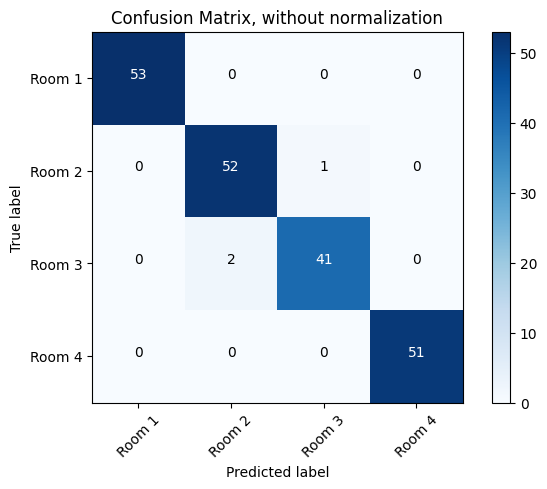



print the true lable with normalization: 


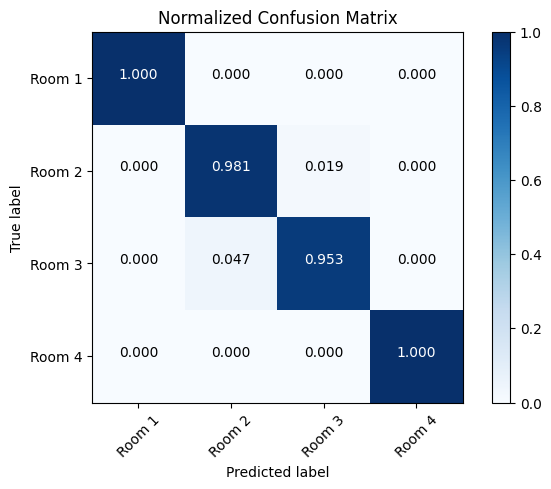



Accuracy: 0.985
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.963
The precision of Room 3 class: 0.976
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.981
The recall of Room 3 class: 0.953
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 1.000
The f1-score of Room 2 class: 0.972
The f1-score of Room 3 class: 0.965
The f1-score of Room 4 class: 1.000


--------------------------------------------------------------------




************************   The 2nd fold   ************************


print true lable numbers：


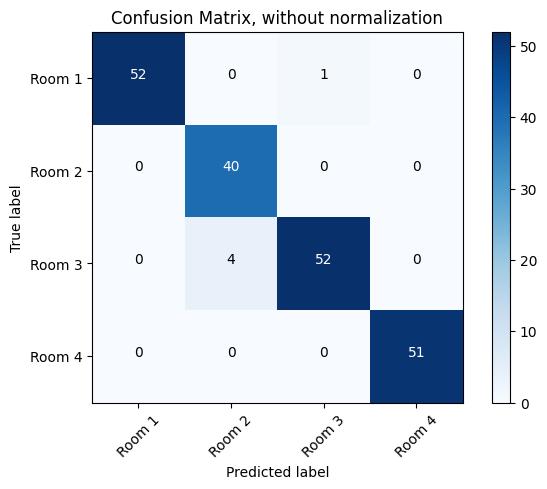



print the true lable with normalization: 


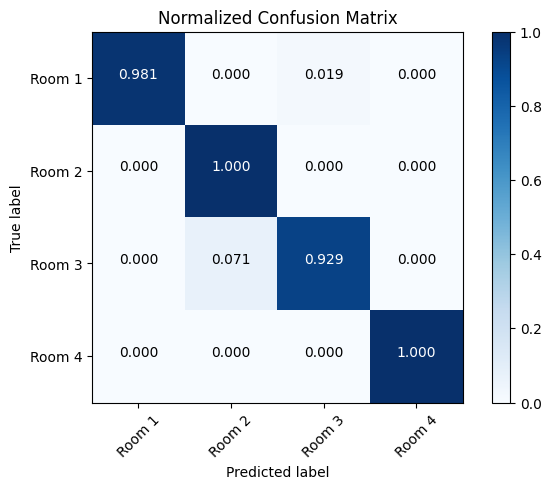



Accuracy: 0.975
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.909
The precision of Room 3 class: 0.981
The precision of Room 4 class: 1.000
The recall of Room 1 class: 0.981
The recall of Room 2 class: 1.000
The recall of Room 3 class: 0.929
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 0.990
The f1-score of Room 2 class: 0.952
The f1-score of Room 3 class: 0.954
The f1-score of Room 4 class: 1.000


--------------------------------------------------------------------




************************   The 3rd fold   ************************


print true lable numbers：


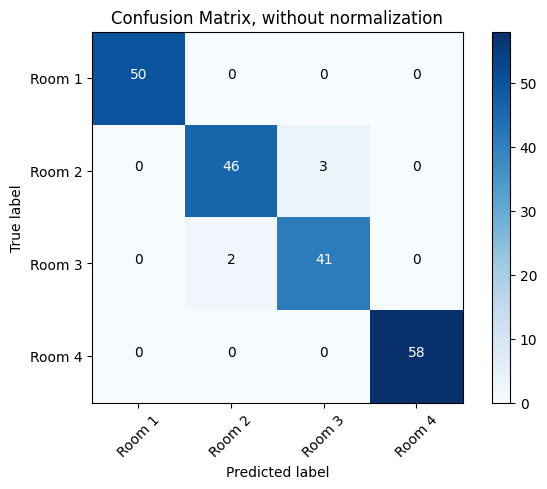



print the true lable with normalization: 


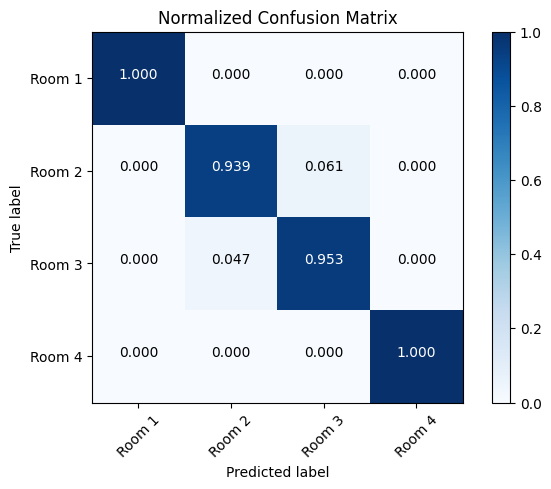



Accuracy: 0.975
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.958
The precision of Room 3 class: 0.932
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.939
The recall of Room 3 class: 0.953
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 1.000
The f1-score of Room 2 class: 0.948
The f1-score of Room 3 class: 0.943
The f1-score of Room 4 class: 1.000


--------------------------------------------------------------------




************************   The 4th fold   ************************


print true lable numbers：


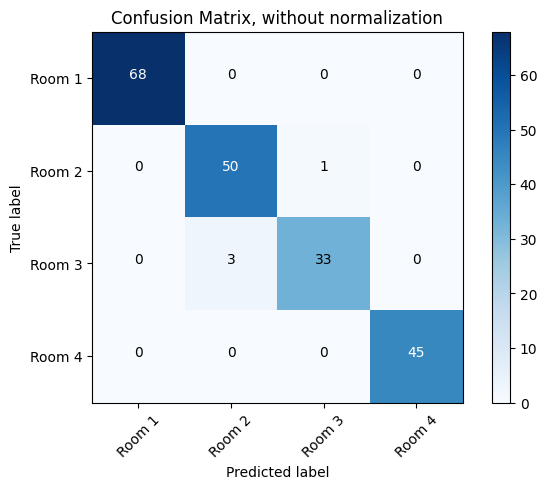



print the true lable with normalization: 


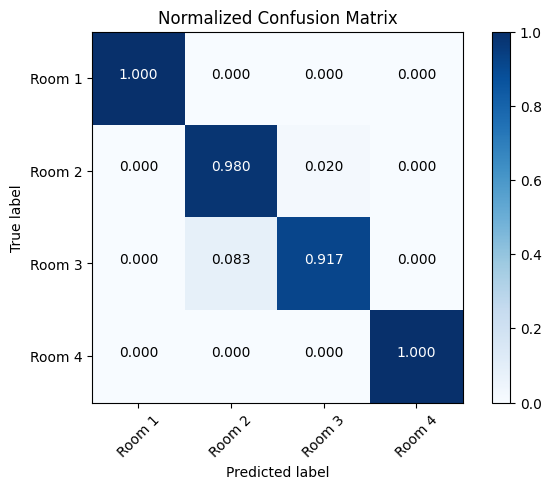



Accuracy: 0.980
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.943
The precision of Room 3 class: 0.971
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.980
The recall of Room 3 class: 0.917
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 1.000
The f1-score of Room 2 class: 0.962
The f1-score of Room 3 class: 0.943
The f1-score of Room 4 class: 1.000


--------------------------------------------------------------------




************************   The 5th fold   ************************


print true lable numbers：


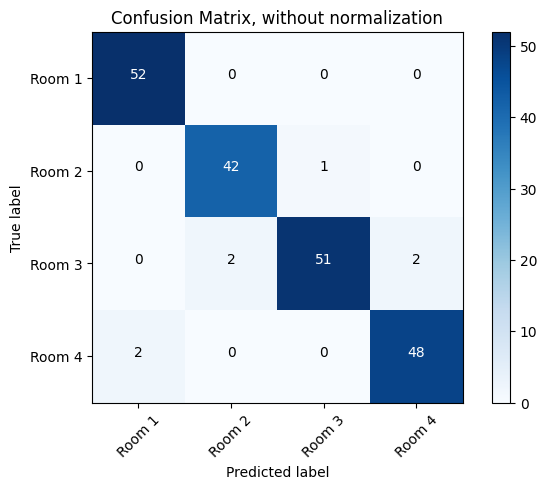



print the true lable with normalization: 


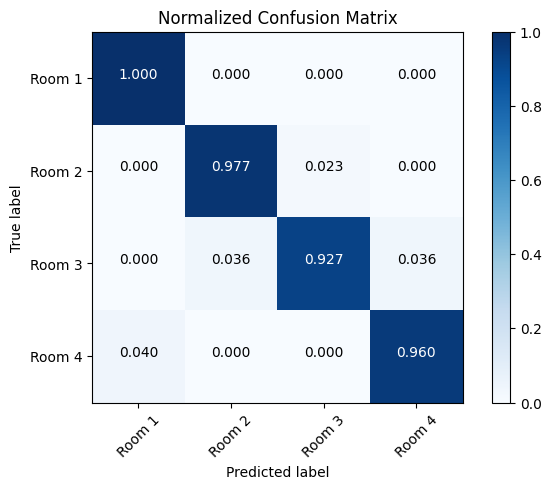



Accuracy: 0.965
The precision of Room 1 class: 0.963
The precision of Room 2 class: 0.955
The precision of Room 3 class: 0.981
The precision of Room 4 class: 0.960
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.977
The recall of Room 3 class: 0.927
The recall of Room 4 class: 0.960
The f1-score of Room 1 class: 0.981
The f1-score of Room 2 class: 0.966
The f1-score of Room 3 class: 0.953
The f1-score of Room 4 class: 0.960


--------------------------------------------------------------------




************************   The 6th fold   ************************


print true lable numbers：


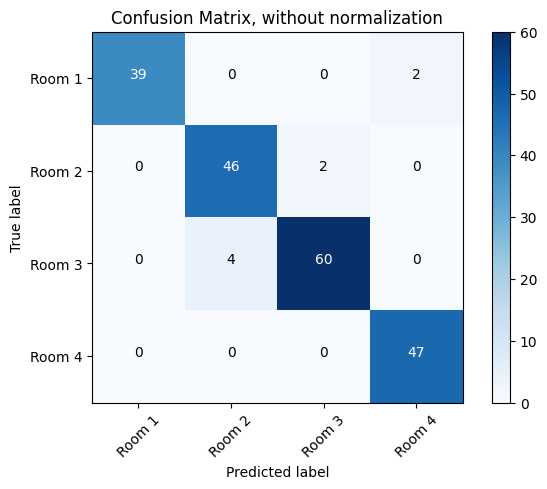



print the true lable with normalization: 


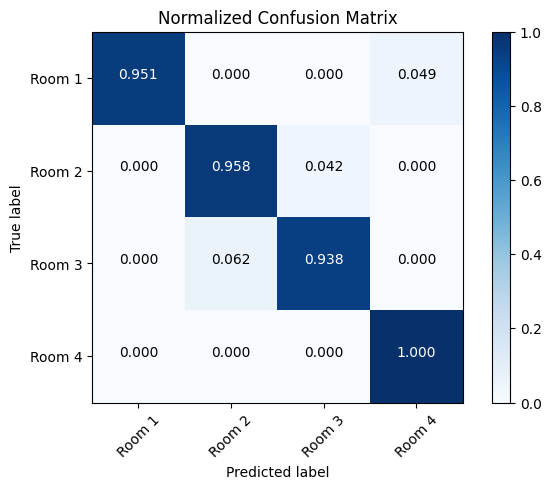



Accuracy: 0.960
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.920
The precision of Room 3 class: 0.968
The precision of Room 4 class: 0.959
The recall of Room 1 class: 0.951
The recall of Room 2 class: 0.958
The recall of Room 3 class: 0.938
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 0.975
The f1-score of Room 2 class: 0.939
The f1-score of Room 3 class: 0.952
The f1-score of Room 4 class: 0.979


--------------------------------------------------------------------




************************   The 7th fold   ************************


print true lable numbers：


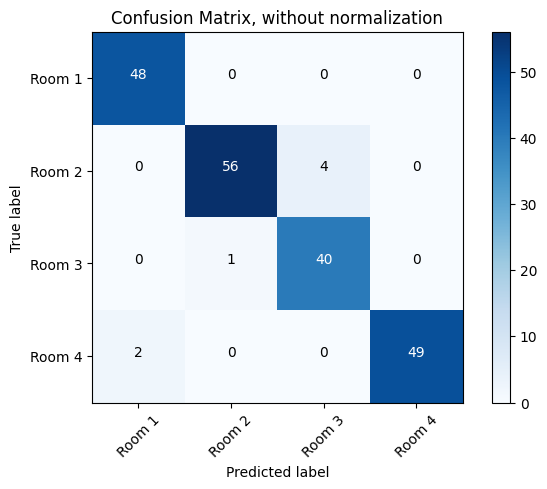



print the true lable with normalization: 


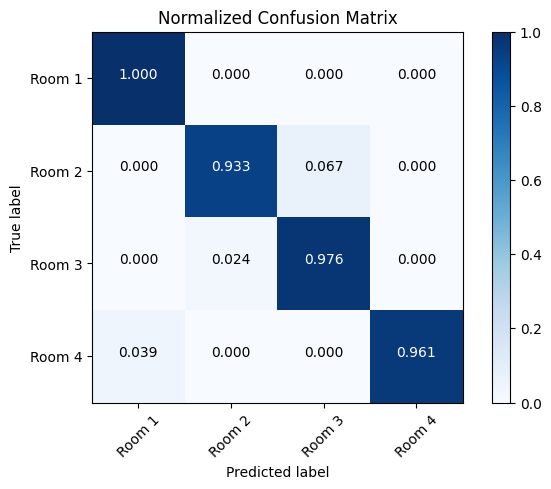



Accuracy: 0.965
The precision of Room 1 class: 0.960
The precision of Room 2 class: 0.982
The precision of Room 3 class: 0.909
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.933
The recall of Room 3 class: 0.976
The recall of Room 4 class: 0.961
The f1-score of Room 1 class: 0.980
The f1-score of Room 2 class: 0.957
The f1-score of Room 3 class: 0.941
The f1-score of Room 4 class: 0.980


--------------------------------------------------------------------




************************   The 8th fold   ************************


print true lable numbers：


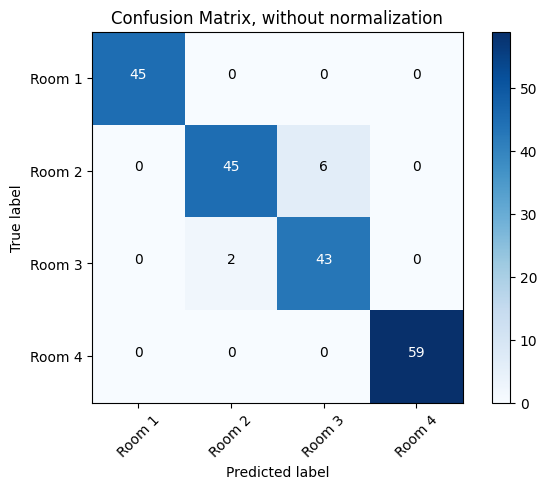



print the true lable with normalization: 


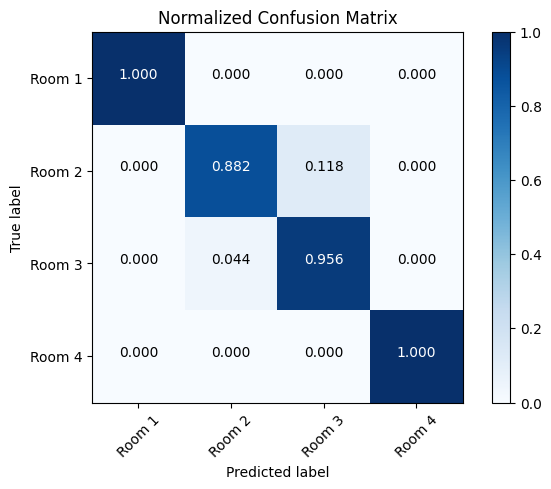



Accuracy: 0.960
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.957
The precision of Room 3 class: 0.878
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.882
The recall of Room 3 class: 0.956
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 1.000
The f1-score of Room 2 class: 0.918
The f1-score of Room 3 class: 0.915
The f1-score of Room 4 class: 1.000


--------------------------------------------------------------------




************************   The 9th fold   ************************


print true lable numbers：


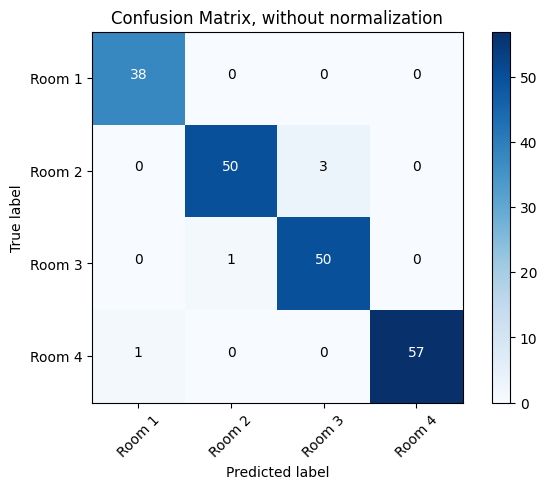



print the true lable with normalization: 


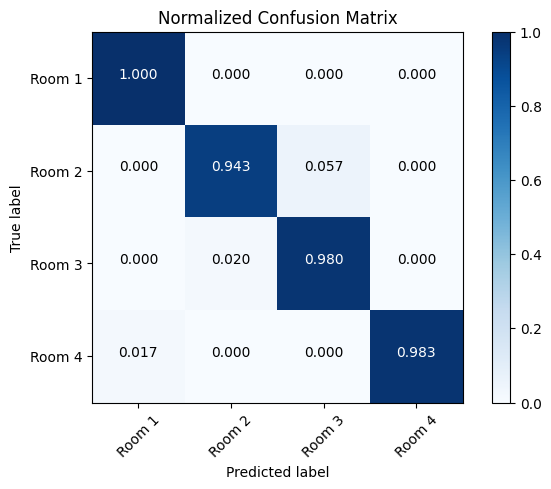



Accuracy: 0.975
The precision of Room 1 class: 0.974
The precision of Room 2 class: 0.980
The precision of Room 3 class: 0.943
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.943
The recall of Room 3 class: 0.980
The recall of Room 4 class: 0.983
The f1-score of Room 1 class: 0.987
The f1-score of Room 2 class: 0.962
The f1-score of Room 3 class: 0.962
The f1-score of Room 4 class: 0.991


--------------------------------------------------------------------




************************   The 10th fold   ************************


print true lable numbers：


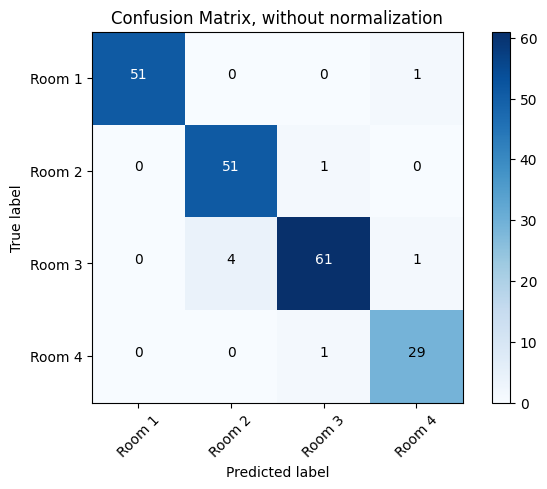



print the true lable with normalization: 


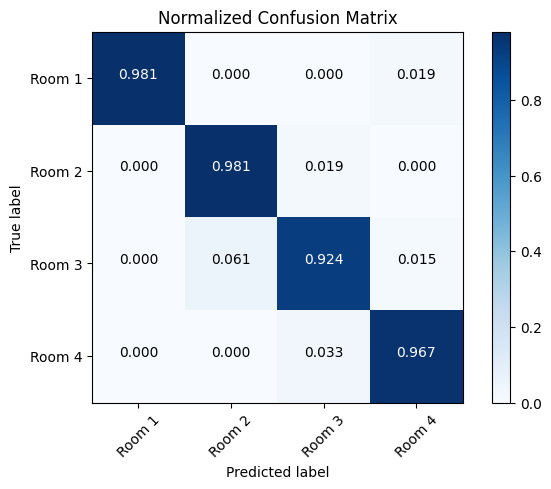



Accuracy: 0.960
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.927
The precision of Room 3 class: 0.968
The precision of Room 4 class: 0.935
The recall of Room 1 class: 0.981
The recall of Room 2 class: 0.981
The recall of Room 3 class: 0.924
The recall of Room 4 class: 0.967
The f1-score of Room 1 class: 0.990
The f1-score of Room 2 class: 0.953
The f1-score of Room 3 class: 0.946
The f1-score of Room 4 class: 0.951


--------------------------------------------------------------------




-------- The Overall Cross Validation Classification Matrix ---------

               Accuracy        Precision_room1 Precision_room2 Precision_room3 Precision_room4 Recall_room1    Recall_room2    Recall_room3    Recall_room4    F1_score_room1  F1_score_room2  F1_score_room3  F1_score_room4  
1st-fold        0.985           1.000           0.963           0.976           1.000           1.000           0.981           0.953           1.000           1.000           0.972   

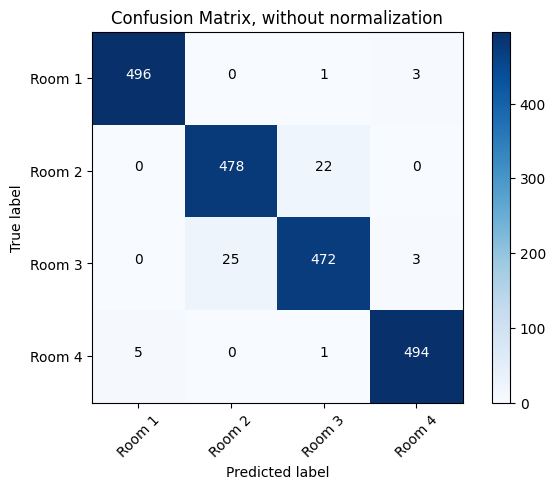



print the true lable with normalization: 


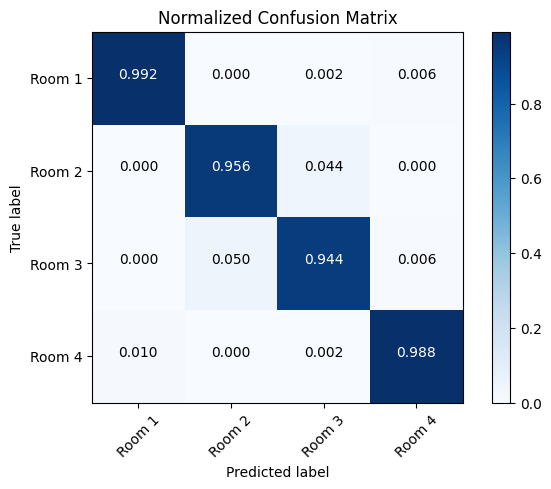



~~~~~~~~~~~~~~~~~ Average over all the test folds ~~~~~~~~~~~~~~~~~
Accuracy:  0.970
The precision of Room 1 class: 0.990
The precision of Room 2 class: 0.950
The precision of Room 3 class: 0.952
The precision of Room 4 class: 0.988
The recall of Room 1 class: 0.992
The recall of Room 2 class: 0.956
The recall of Room 3 class: 0.944
The recall of Room 4 class: 0.988
The f1-score of Room 1 class: 0.991
The f1-score of Room 2 class: 0.953
The f1-score of Room 3 class: 0.948
The f1-score of Room 4 class: 0.988


--------------------------------------------------------------------






In [ ]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~ CLEAN DATASET ~~~~~~~~~~~~~~~~~~~~~~~~~~\n')
before_prune_training_and_validation(clean)


~~~~~~~~~~~~~~~~~~~~~~~~~~ NOISE DATASET ~~~~~~~~~~~~~~~~~~~~~~~~~~

************************   The 1st fold   ************************


print true lable numbers：


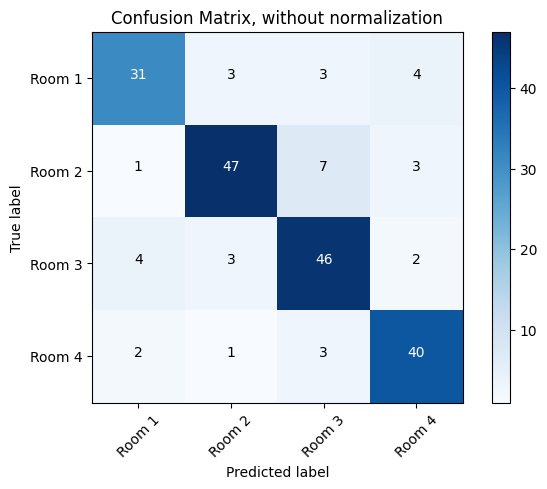



print the true lable with normalization: 


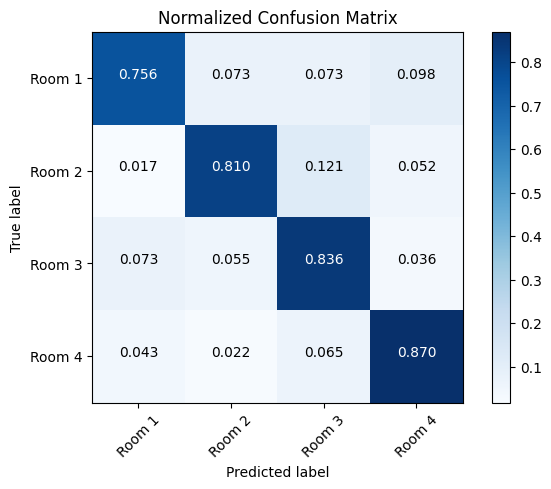



Accuracy: 0.820
The precision of Room 1 class: 0.816
The precision of Room 2 class: 0.870
The precision of Room 3 class: 0.780
The precision of Room 4 class: 0.816
The recall of Room 1 class: 0.756
The recall of Room 2 class: 0.810
The recall of Room 3 class: 0.836
The recall of Room 4 class: 0.870
The f1-score of Room 1 class: 0.785
The f1-score of Room 2 class: 0.839
The f1-score of Room 3 class: 0.807
The f1-score of Room 4 class: 0.842


--------------------------------------------------------------------




************************   The 2nd fold   ************************


print true lable numbers：


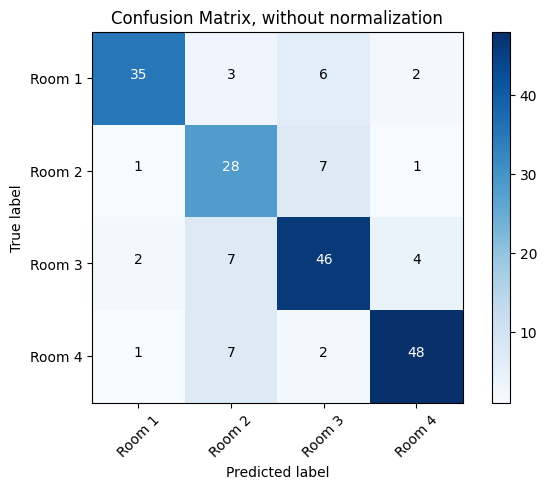



print the true lable with normalization: 


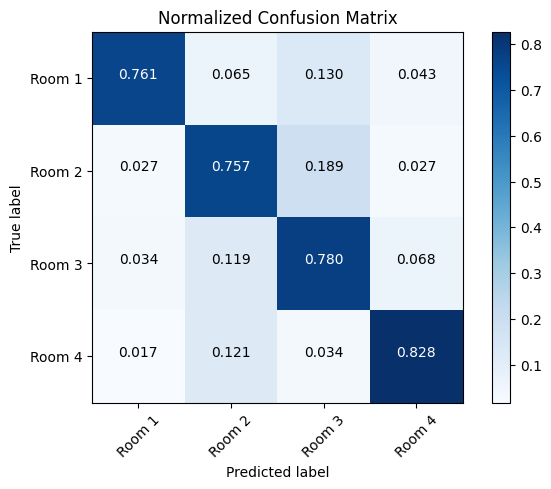



Accuracy: 0.785
The precision of Room 1 class: 0.897
The precision of Room 2 class: 0.622
The precision of Room 3 class: 0.754
The precision of Room 4 class: 0.873
The recall of Room 1 class: 0.761
The recall of Room 2 class: 0.757
The recall of Room 3 class: 0.780
The recall of Room 4 class: 0.828
The f1-score of Room 1 class: 0.824
The f1-score of Room 2 class: 0.683
The f1-score of Room 3 class: 0.767
The f1-score of Room 4 class: 0.850


--------------------------------------------------------------------




************************   The 3rd fold   ************************


print true lable numbers：


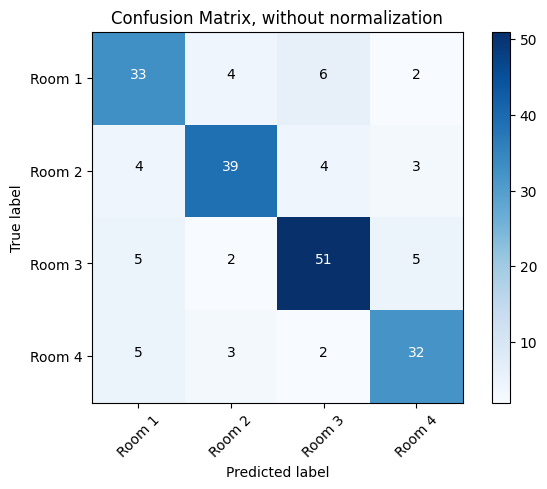



print the true lable with normalization: 


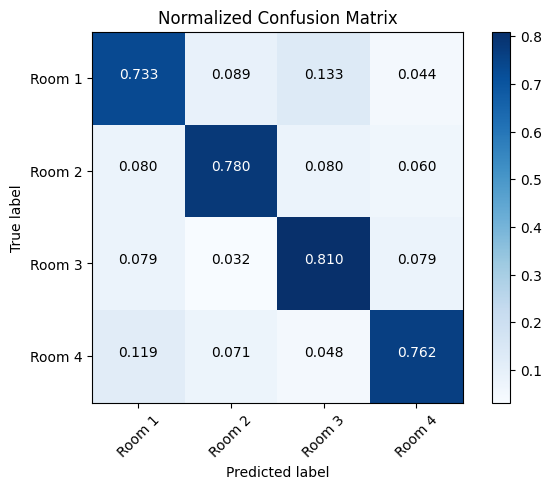



Accuracy: 0.775
The precision of Room 1 class: 0.702
The precision of Room 2 class: 0.812
The precision of Room 3 class: 0.810
The precision of Room 4 class: 0.762
The recall of Room 1 class: 0.733
The recall of Room 2 class: 0.780
The recall of Room 3 class: 0.810
The recall of Room 4 class: 0.762
The f1-score of Room 1 class: 0.717
The f1-score of Room 2 class: 0.796
The f1-score of Room 3 class: 0.810
The f1-score of Room 4 class: 0.762


--------------------------------------------------------------------




************************   The 4th fold   ************************


print true lable numbers：


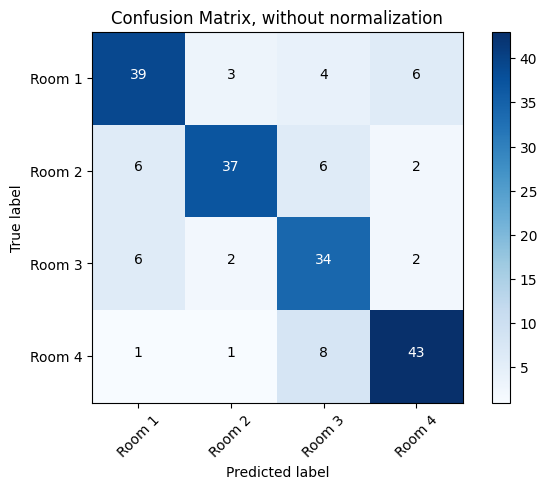



print the true lable with normalization: 


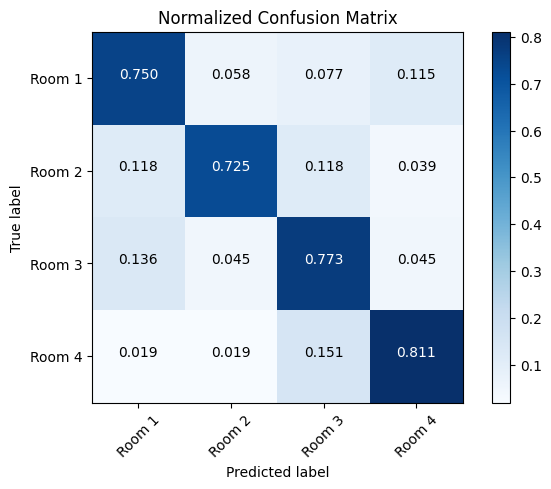



Accuracy: 0.765
The precision of Room 1 class: 0.750
The precision of Room 2 class: 0.860
The precision of Room 3 class: 0.654
The precision of Room 4 class: 0.811
The recall of Room 1 class: 0.750
The recall of Room 2 class: 0.725
The recall of Room 3 class: 0.773
The recall of Room 4 class: 0.811
The f1-score of Room 1 class: 0.750
The f1-score of Room 2 class: 0.787
The f1-score of Room 3 class: 0.708
The f1-score of Room 4 class: 0.811


--------------------------------------------------------------------




************************   The 5th fold   ************************


print true lable numbers：


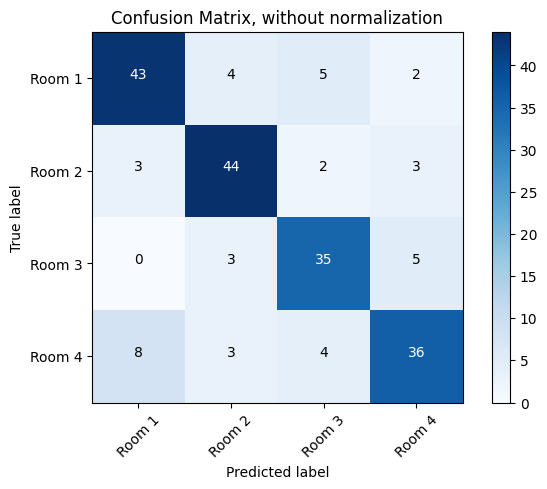



print the true lable with normalization: 


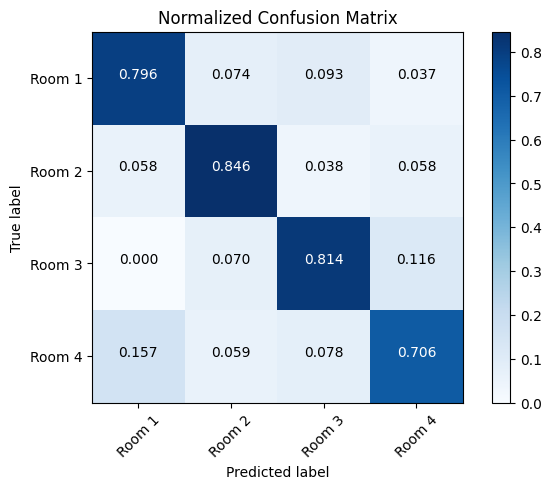



Accuracy: 0.790
The precision of Room 1 class: 0.796
The precision of Room 2 class: 0.815
The precision of Room 3 class: 0.761
The precision of Room 4 class: 0.783
The recall of Room 1 class: 0.796
The recall of Room 2 class: 0.846
The recall of Room 3 class: 0.814
The recall of Room 4 class: 0.706
The f1-score of Room 1 class: 0.796
The f1-score of Room 2 class: 0.830
The f1-score of Room 3 class: 0.787
The f1-score of Room 4 class: 0.742


--------------------------------------------------------------------




************************   The 6th fold   ************************


print true lable numbers：


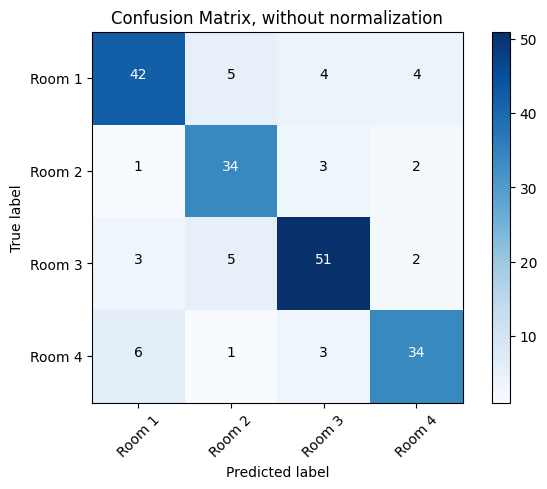



print the true lable with normalization: 


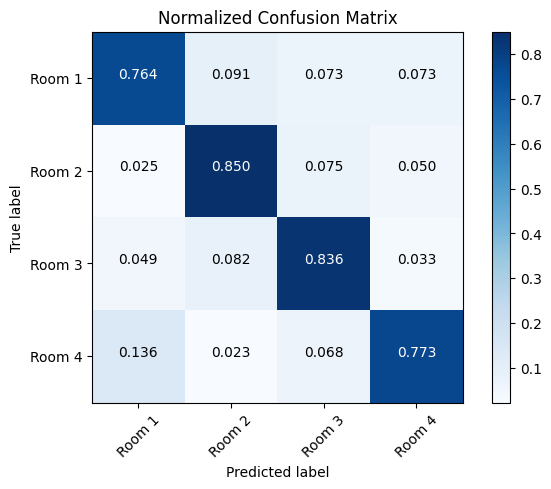



Accuracy: 0.805
The precision of Room 1 class: 0.808
The precision of Room 2 class: 0.756
The precision of Room 3 class: 0.836
The precision of Room 4 class: 0.810
The recall of Room 1 class: 0.764
The recall of Room 2 class: 0.850
The recall of Room 3 class: 0.836
The recall of Room 4 class: 0.773
The f1-score of Room 1 class: 0.785
The f1-score of Room 2 class: 0.800
The f1-score of Room 3 class: 0.836
The f1-score of Room 4 class: 0.791


--------------------------------------------------------------------




************************   The 7th fold   ************************


print true lable numbers：


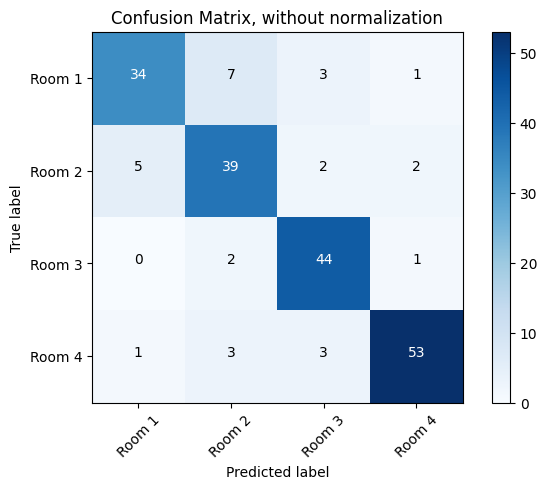



print the true lable with normalization: 


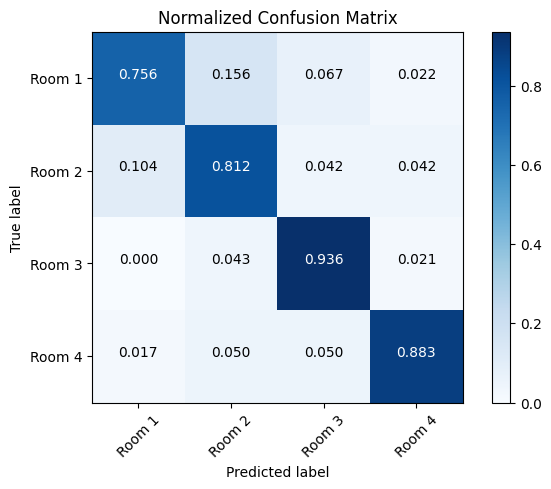



Accuracy: 0.850
The precision of Room 1 class: 0.850
The precision of Room 2 class: 0.765
The precision of Room 3 class: 0.846
The precision of Room 4 class: 0.930
The recall of Room 1 class: 0.756
The recall of Room 2 class: 0.812
The recall of Room 3 class: 0.936
The recall of Room 4 class: 0.883
The f1-score of Room 1 class: 0.800
The f1-score of Room 2 class: 0.788
The f1-score of Room 3 class: 0.889
The f1-score of Room 4 class: 0.906


--------------------------------------------------------------------




************************   The 8th fold   ************************


print true lable numbers：


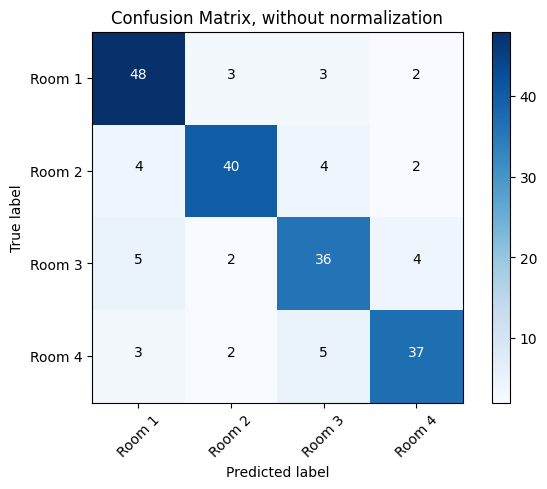



print the true lable with normalization: 


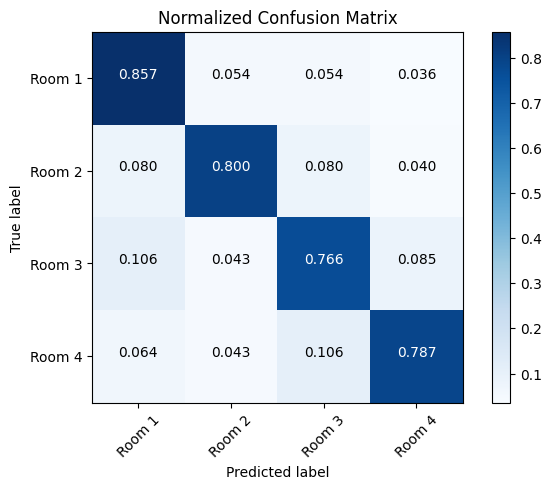



Accuracy: 0.805
The precision of Room 1 class: 0.800
The precision of Room 2 class: 0.851
The precision of Room 3 class: 0.750
The precision of Room 4 class: 0.822
The recall of Room 1 class: 0.857
The recall of Room 2 class: 0.800
The recall of Room 3 class: 0.766
The recall of Room 4 class: 0.787
The f1-score of Room 1 class: 0.828
The f1-score of Room 2 class: 0.825
The f1-score of Room 3 class: 0.758
The f1-score of Room 4 class: 0.804


--------------------------------------------------------------------




************************   The 9th fold   ************************


print true lable numbers：


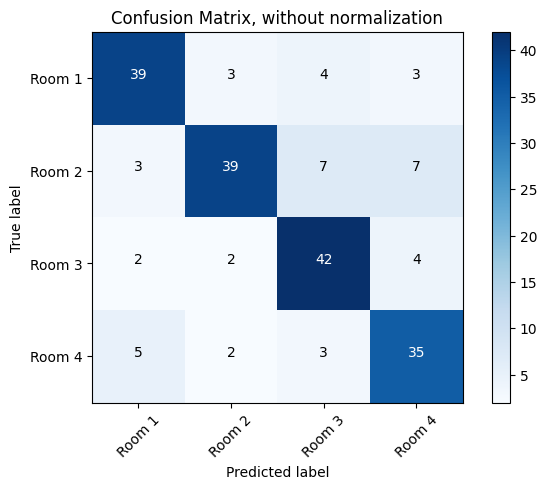



print the true lable with normalization: 


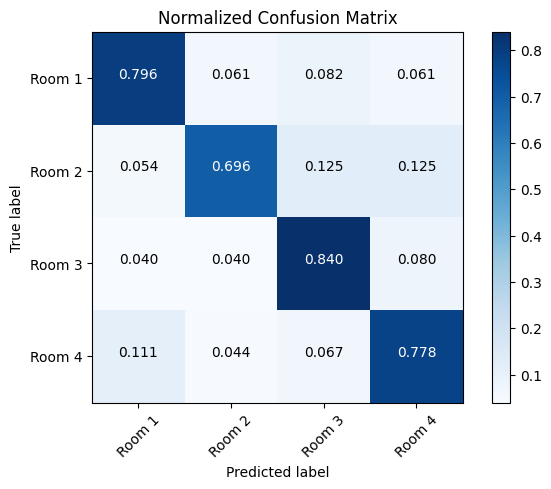



Accuracy: 0.775
The precision of Room 1 class: 0.796
The precision of Room 2 class: 0.848
The precision of Room 3 class: 0.750
The precision of Room 4 class: 0.714
The recall of Room 1 class: 0.796
The recall of Room 2 class: 0.696
The recall of Room 3 class: 0.840
The recall of Room 4 class: 0.778
The f1-score of Room 1 class: 0.796
The f1-score of Room 2 class: 0.765
The f1-score of Room 3 class: 0.792
The f1-score of Room 4 class: 0.745


--------------------------------------------------------------------




************************   The 10th fold   ************************


print true lable numbers：


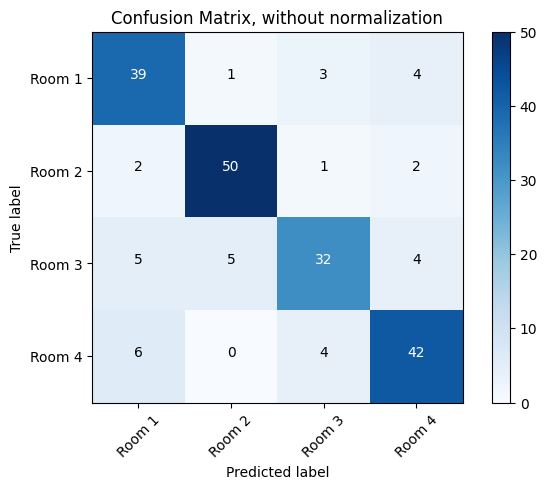



print the true lable with normalization: 


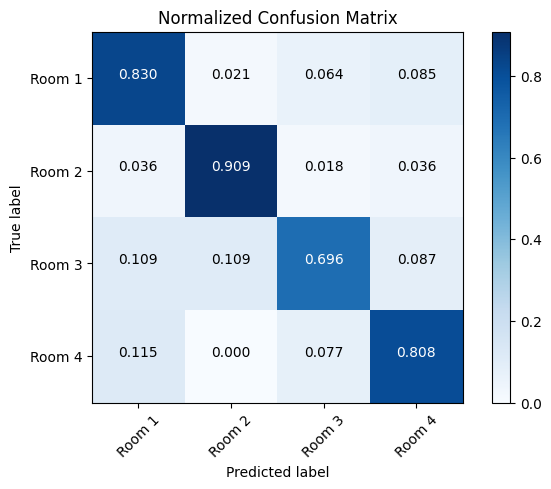



Accuracy: 0.815
The precision of Room 1 class: 0.750
The precision of Room 2 class: 0.893
The precision of Room 3 class: 0.800
The precision of Room 4 class: 0.808
The recall of Room 1 class: 0.830
The recall of Room 2 class: 0.909
The recall of Room 3 class: 0.696
The recall of Room 4 class: 0.808
The f1-score of Room 1 class: 0.788
The f1-score of Room 2 class: 0.901
The f1-score of Room 3 class: 0.744
The f1-score of Room 4 class: 0.808


--------------------------------------------------------------------




-------- The Overall Cross Validation Classification Matrix ---------

               Accuracy        Precision_room1 Precision_room2 Precision_room3 Precision_room4 Recall_room1    Recall_room2    Recall_room3    Recall_room4    F1_score_room1  F1_score_room2  F1_score_room3  F1_score_room4  
1st-fold        0.820           0.816           0.870           0.780           0.816           0.756           0.810           0.836           0.870           0.785           0.839   

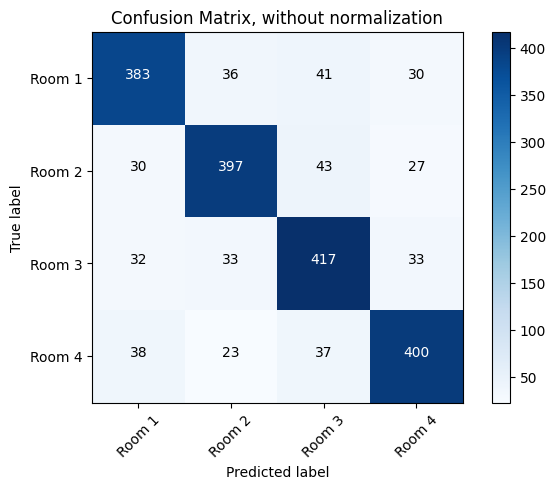



print the true lable with normalization: 


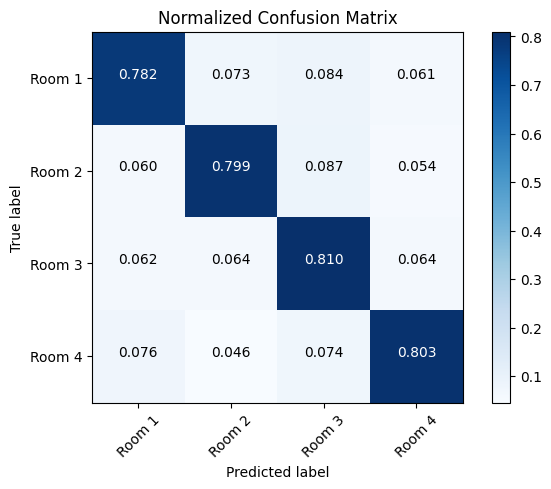



~~~~~~~~~~~~~~~~~ Average over all the test folds ~~~~~~~~~~~~~~~~~
Accuracy:  0.798
The precision of Room 1 class: 0.793
The precision of Room 2 class: 0.812
The precision of Room 3 class: 0.775
The precision of Room 4 class: 0.816
The recall of Room 1 class: 0.782
The recall of Room 2 class: 0.799
The recall of Room 3 class: 0.810
The recall of Room 4 class: 0.803
The f1-score of Room 1 class: 0.787
The f1-score of Room 2 class: 0.805
The f1-score of Room 3 class: 0.792
The f1-score of Room 4 class: 0.810


--------------------------------------------------------------------






In [ ]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~ NOISE DATASET ~~~~~~~~~~~~~~~~~~~~~~~~~~\n')
before_prune_training_and_validation(noise)

# **Prune**#

In [ ]:
def prune(root, node, accuracy, validation_data, validation_label):
    if 'visited' in node or 'label' in node: # see a leaf or visited branch
        return False, 0

    r = np.random.rand()
    if r > 0.5:
      success_l, l_accuracy = prune(root, node['l_node'], accuracy, validation_data, validation_label)
      success_r, r_accuracy = prune(root, node['r_node'], l_accuracy, validation_data, validation_label)
      curr_accuracy = r_accuracy
    else:
      success_r, r_accuracy = prune(root, node['r_node'], accuracy, validation_data, validation_label)
      success_l, l_accuracy = prune(root, node['l_node'], r_accuracy, validation_data, validation_label)
      curr_accuracy = success_l
    if 'label' in node['l_node'] and 'label' in node['r_node']: #detect and group 2 leaf nodes into 1
        node['visited'] = True
        temp_trim_node = node.copy()
        if node['l_node']['num_data'] > node['r_node']['num_data']:
            node['label'] = node['l_node']['label']
        else:
            node['label'] = node['r_node']['label']
        node['num_data'] = node['l_node']['num_data'] + node['r_node']['num_data']
        # for visual & delete unnecessary data
        del node['l_node']
        del node['r_node']
        del node['split_val']
        del node['feature_ind']
        ###evaluate tree
        avg_accuracy_pruned = get_accuracy(validation_data, validation_label, root)
        if avg_accuracy_pruned >= curr_accuracy: # make it a evaluate(acc_new, acc_original) --> T/F
            return True, avg_accuracy_pruned
        else:
            node.clear()
            for key in temp_trim_node:
                node[key] = temp_trim_node[key]
            return False, curr_accuracy
    # success_l = prune(node['l_node'])
    # success_r = prune(node['r_node'])
    pruned = success_l or success_r
    return pruned, curr_accuracy

# **! Cross-validation classification metrics for both clean and noisy data** #
# **! -------------------------------After Pruning-------------------------------** #
1. get_accuracy
2. get_depth
3. training_and_validation

In [ ]:
def get_accuracy(data, label, trained_tree):
  curr_mat = confusion_matrix(data, trained_tree, label)
  accuracy = overall_evaluation_indicator(curr_mat)
  return accuracy

In [ ]:
def get_depth(tree):
  if 'label' in tree: return 1
  left_depth = get_depth(tree['l_node'])
  right_depth = get_depth(tree['r_node'])
  depth = max(left_depth, right_depth) + 1
  return depth

In [ ]:
def training_and_validation(dataset):

  pruned_threshold = 0.01
  best_accuracy = 0
  k_out_output = k_fold_cross_validation(dataset, 10)
  trained_depth_list = list()
  pruned_depth_list = list()
  sum_mat = np.zeros((4,4))
  for k_out in range(10):
    print("k_out ", k_out)
    curr_sum_mat = np.zeros((4,4))
    data, test_data, test_label = k_out_output[k_out].values()
    k_in_output = k_fold_cross_validation(data, 9)
    for k_in in range(9):
      print("k_in ", k_in)
      train_data, validation_data, validation_label = k_in_output[k_in].values()
      # generate decision tree based on current training data
      trained_tree, _depth = decision_tree_learning(train_data)
      trained_depth_list.append(_depth)
      if k_in == 0:
        best_tree = trained_tree
      pruned_tree = trained_tree.copy()
      curr_best_accuracy = get_accuracy(validation_data, validation_label, trained_tree)
      print("trained_accuracy", curr_best_accuracy)
      success = True
      while success:
        success, accuracy = prune(pruned_tree, pruned_tree, curr_best_accuracy, validation_data, validation_label)
      pruned_accuracy = get_accuracy(validation_data, validation_label, pruned_tree)
      pruned_depth = get_depth(pruned_tree)
      pruned_depth_list.append(pruned_depth)
      if pruned_accuracy >= best_accuracy:
        best_tree = pruned_tree
        best_accuracy = pruned_accuracy
      print("curr_accuracy", pruned_accuracy)
      print("accuracy ", best_accuracy)
      print("trained depth: ", get_depth(pruned_tree))
      print("pruned depth: ", get_depth(pruned_tree))
    # mat = confusion_matrix(validation_data, trained_tree, validation_label)
    # print_fold(k_out)
    # plot_result(mat)
    # print_fold_indicators(k_out,mat)
    # for row in range(4):
    #     for col in range(4):
    #         sum_mat[row, col] += mat[row, col]

  avg_trained_depth = sum(trained_depth_list) / len(trained_depth_list)
  avg_pruned_depth = sum(pruned_depth_list) / len(pruned_depth_list)

  print(best_tree)
  print(pruned_accuracy)
  print("[AVG trained depth] ", avg_trained_depth)
  print("[AVG pruned depth] ", avg_pruned_depth)
  # print('-------- The Overall Cross Validation Classification Matrix ---------\n')
  # print_all_folds_indicators(indicators_values)
  # plot_result(sum_mat)
  # overall_evaluation_indicator(sum_mat, True)

************************   The 1st fold   ************************


print true lable numbers：


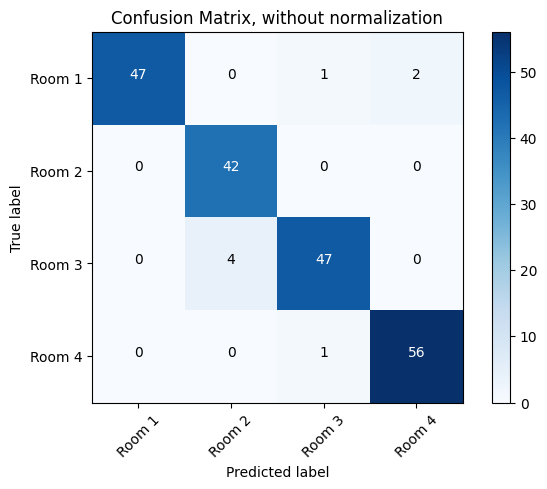



print the true lable with normalization: 


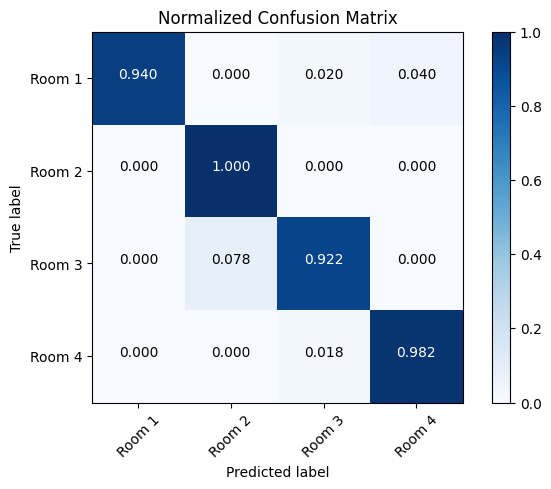



Accuracy: 0.960
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.913
The precision of Room 3 class: 0.959
The precision of Room 4 class: 0.966
The recall of Room 1 class: 0.940
The recall of Room 2 class: 1.000
The recall of Room 3 class: 0.922
The recall of Room 4 class: 0.982
The f1-score of Room 1 class: 0.969
The f1-score of Room 2 class: 0.955
The f1-score of Room 3 class: 0.940
The f1-score of Room 4 class: 0.974


--------------------------------------------------------------------




************************   The 2nd fold   ************************


print true lable numbers：


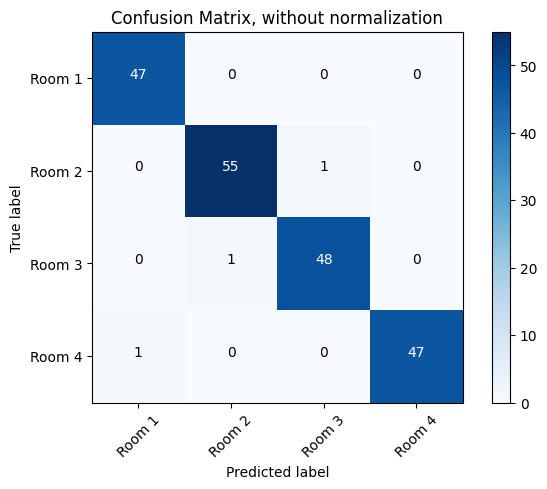



print the true lable with normalization: 


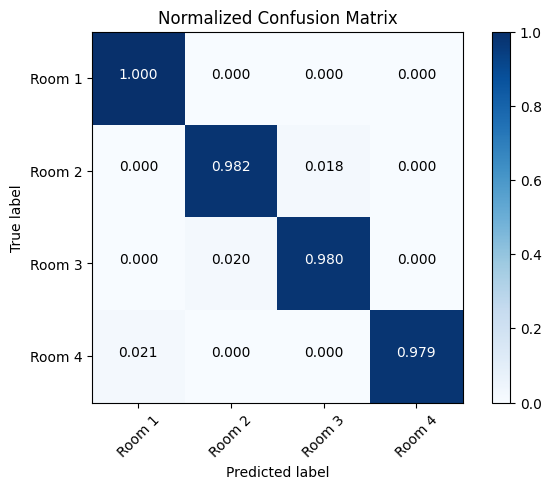



Accuracy: 0.985
The precision of Room 1 class: 0.979
The precision of Room 2 class: 0.982
The precision of Room 3 class: 0.980
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.982
The recall of Room 3 class: 0.980
The recall of Room 4 class: 0.979
The f1-score of Room 1 class: 0.989
The f1-score of Room 2 class: 0.982
The f1-score of Room 3 class: 0.980
The f1-score of Room 4 class: 0.989


--------------------------------------------------------------------




************************   The 3rd fold   ************************


print true lable numbers：


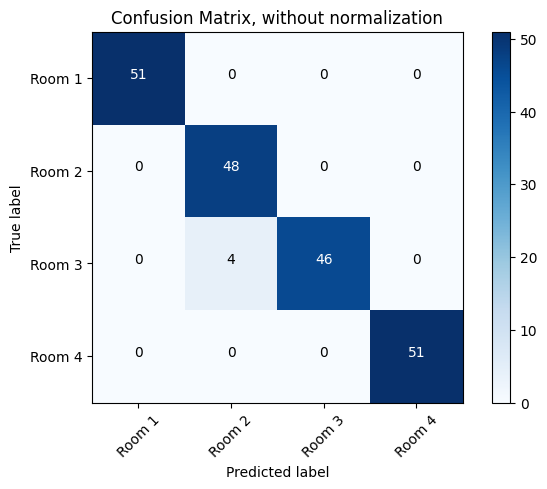



print the true lable with normalization: 


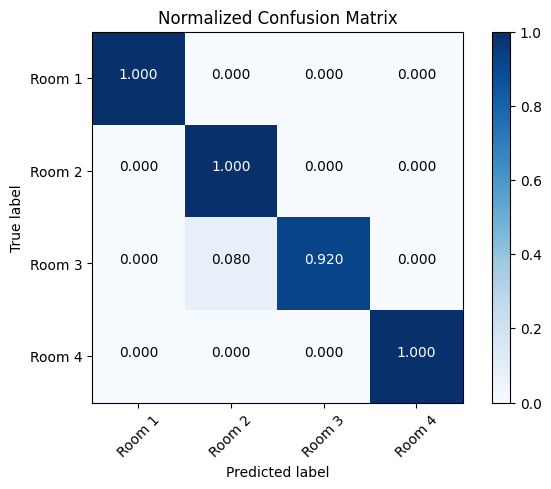



Accuracy: 0.980
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.923
The precision of Room 3 class: 1.000
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 1.000
The recall of Room 3 class: 0.920
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 1.000
The f1-score of Room 2 class: 0.960
The f1-score of Room 3 class: 0.958
The f1-score of Room 4 class: 1.000


--------------------------------------------------------------------




************************   The 4th fold   ************************


print true lable numbers：


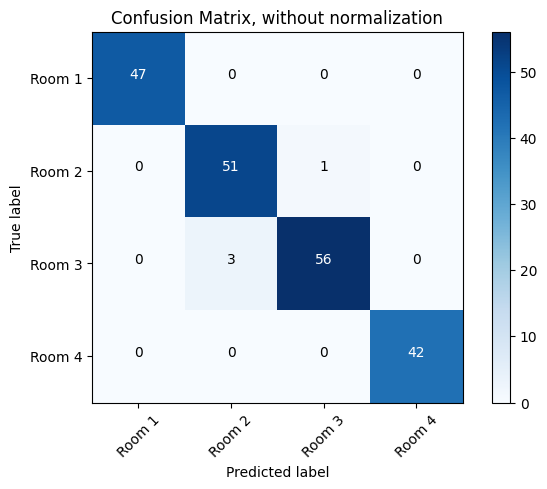



print the true lable with normalization: 


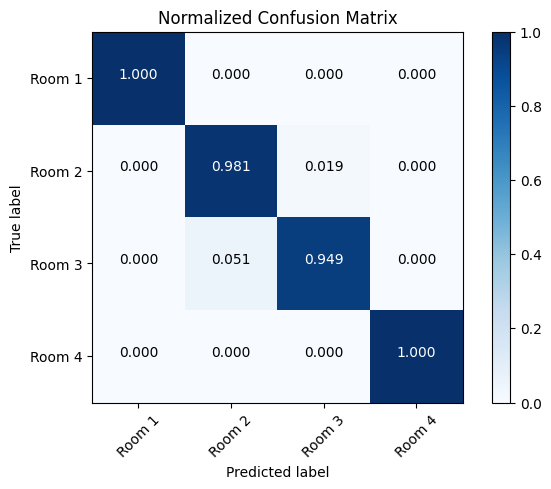



Accuracy: 0.980
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.944
The precision of Room 3 class: 0.982
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.981
The recall of Room 3 class: 0.949
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 1.000
The f1-score of Room 2 class: 0.962
The f1-score of Room 3 class: 0.966
The f1-score of Room 4 class: 1.000


--------------------------------------------------------------------




************************   The 5th fold   ************************


print true lable numbers：


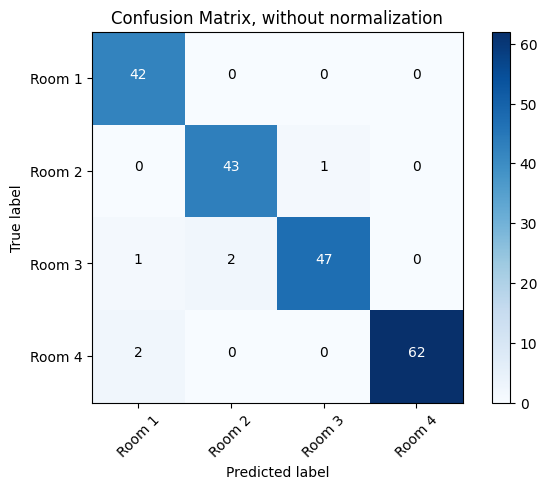



print the true lable with normalization: 


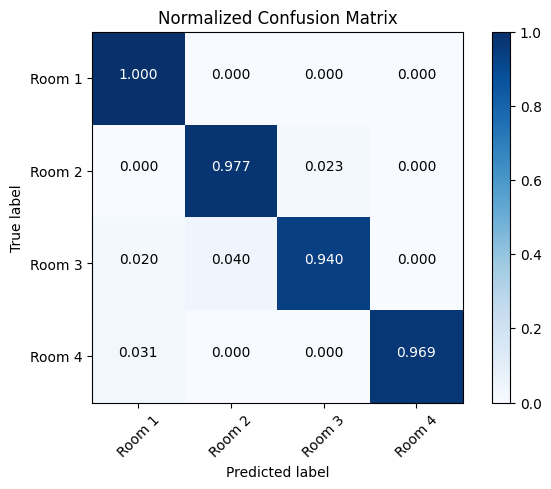



Accuracy: 0.970
The precision of Room 1 class: 0.933
The precision of Room 2 class: 0.956
The precision of Room 3 class: 0.979
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.977
The recall of Room 3 class: 0.940
The recall of Room 4 class: 0.969
The f1-score of Room 1 class: 0.966
The f1-score of Room 2 class: 0.966
The f1-score of Room 3 class: 0.959
The f1-score of Room 4 class: 0.984


--------------------------------------------------------------------




************************   The 6th fold   ************************


print true lable numbers：


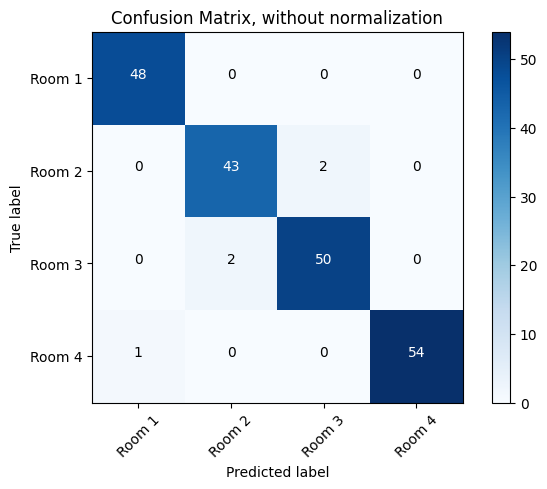



print the true lable with normalization: 


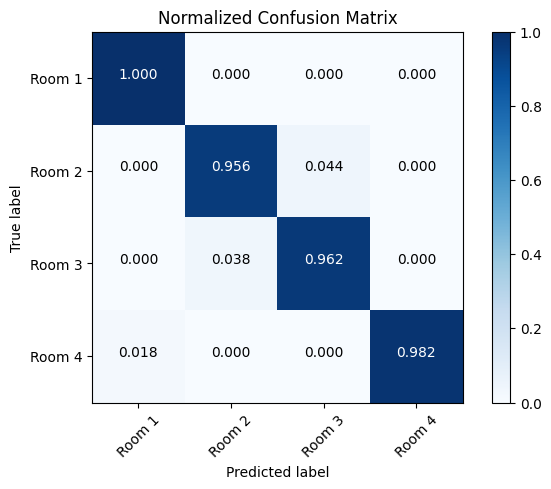



Accuracy: 0.975
The precision of Room 1 class: 0.980
The precision of Room 2 class: 0.956
The precision of Room 3 class: 0.962
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.956
The recall of Room 3 class: 0.962
The recall of Room 4 class: 0.982
The f1-score of Room 1 class: 0.990
The f1-score of Room 2 class: 0.956
The f1-score of Room 3 class: 0.962
The f1-score of Room 4 class: 0.991


--------------------------------------------------------------------




************************   The 7th fold   ************************


print true lable numbers：


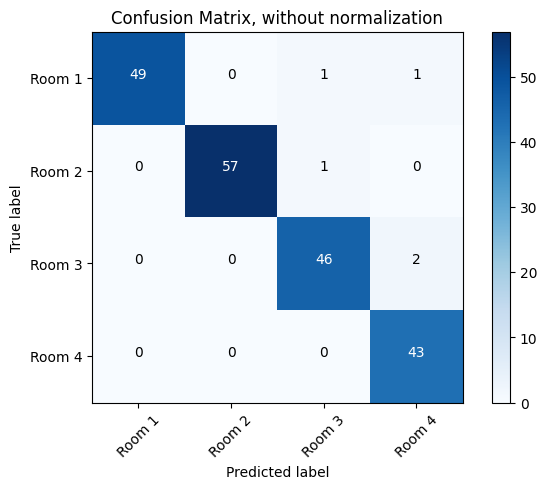



print the true lable with normalization: 


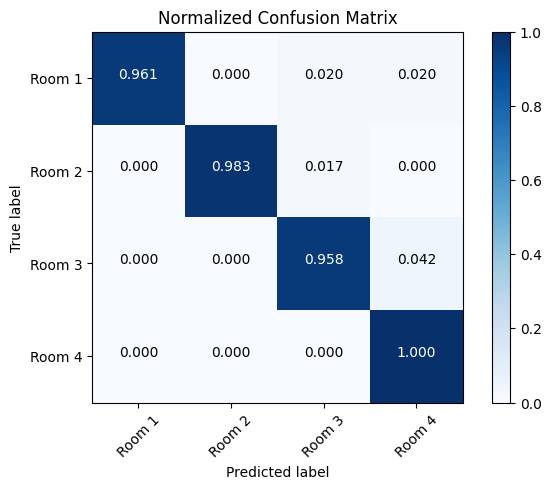



Accuracy: 0.975
The precision of Room 1 class: 1.000
The precision of Room 2 class: 1.000
The precision of Room 3 class: 0.958
The precision of Room 4 class: 0.935
The recall of Room 1 class: 0.961
The recall of Room 2 class: 0.983
The recall of Room 3 class: 0.958
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 0.980
The f1-score of Room 2 class: 0.991
The f1-score of Room 3 class: 0.958
The f1-score of Room 4 class: 0.966


--------------------------------------------------------------------




************************   The 8th fold   ************************


print true lable numbers：


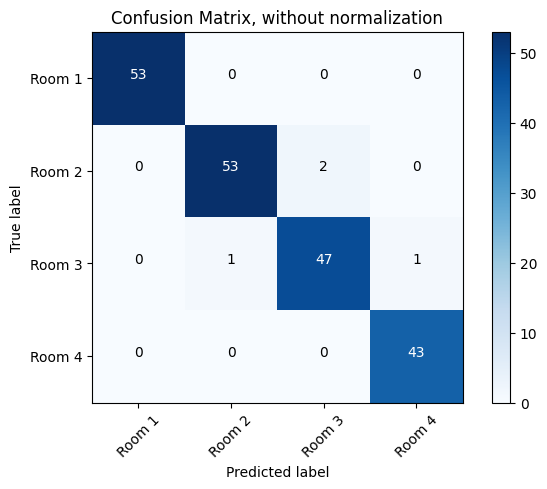



print the true lable with normalization: 


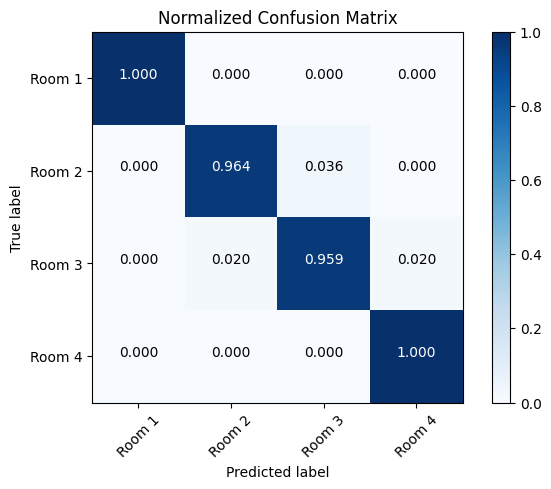



Accuracy: 0.980
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.981
The precision of Room 3 class: 0.959
The precision of Room 4 class: 0.977
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.964
The recall of Room 3 class: 0.959
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 1.000
The f1-score of Room 2 class: 0.972
The f1-score of Room 3 class: 0.959
The f1-score of Room 4 class: 0.989


--------------------------------------------------------------------




************************   The 9th fold   ************************


print true lable numbers：


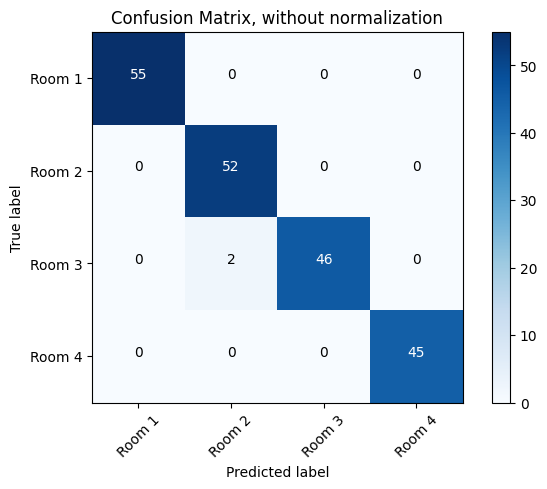



print the true lable with normalization: 


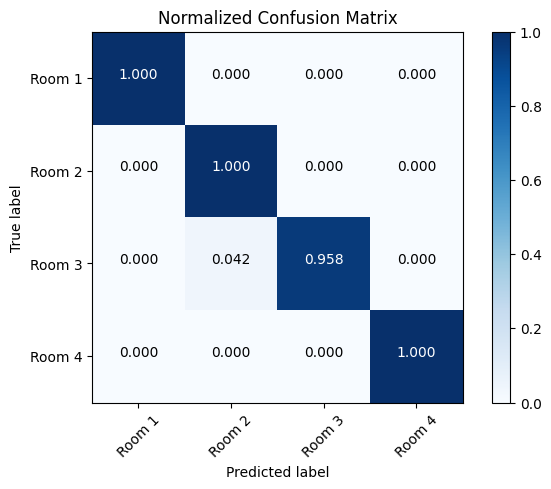



Accuracy: 0.990
The precision of Room 1 class: 1.000
The precision of Room 2 class: 0.963
The precision of Room 3 class: 1.000
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 1.000
The recall of Room 3 class: 0.958
The recall of Room 4 class: 1.000
The f1-score of Room 1 class: 1.000
The f1-score of Room 2 class: 0.981
The f1-score of Room 3 class: 0.979
The f1-score of Room 4 class: 1.000


--------------------------------------------------------------------




************************   The 10th fold   ************************


print true lable numbers：


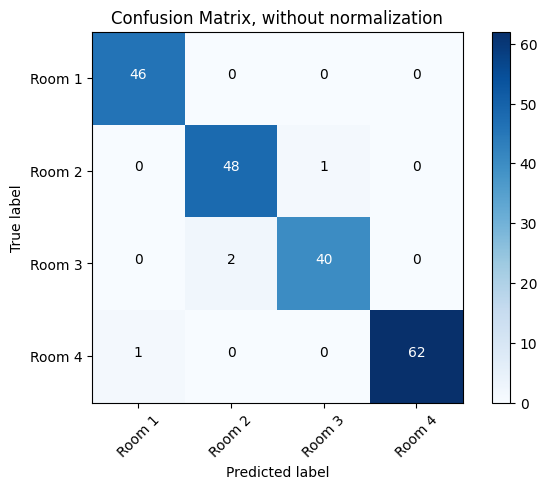



print the true lable with normalization: 


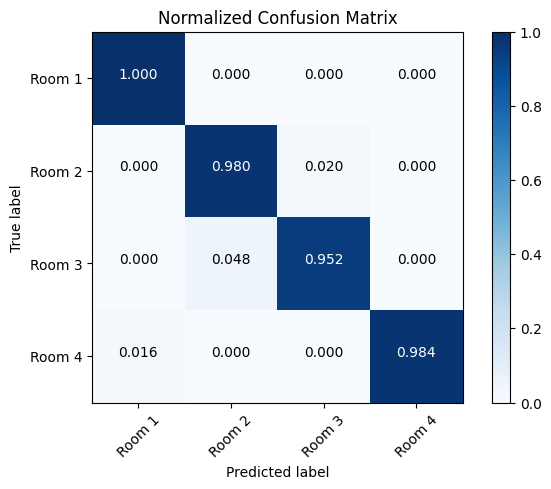



Accuracy: 0.980
The precision of Room 1 class: 0.979
The precision of Room 2 class: 0.960
The precision of Room 3 class: 0.976
The precision of Room 4 class: 1.000
The recall of Room 1 class: 1.000
The recall of Room 2 class: 0.980
The recall of Room 3 class: 0.952
The recall of Room 4 class: 0.984
The f1-score of Room 1 class: 0.989
The f1-score of Room 2 class: 0.970
The f1-score of Room 3 class: 0.964
The f1-score of Room 4 class: 0.992


--------------------------------------------------------------------




-------- The Overall Cross Validation Classification Matrix ---------

               Accuracy        Precision_room1 Precision_room2 Precision_room3 Precision_room4 Recall_room1    Recall_room2    Recall_room3    Recall_room4    F1_score_room1  F1_score_room2  F1_score_room3  F1_score_room4  
1st-fold        0.960           1.000           0.913           0.959           0.966           0.940           1.000           0.922           0.982           0.969           0.955   

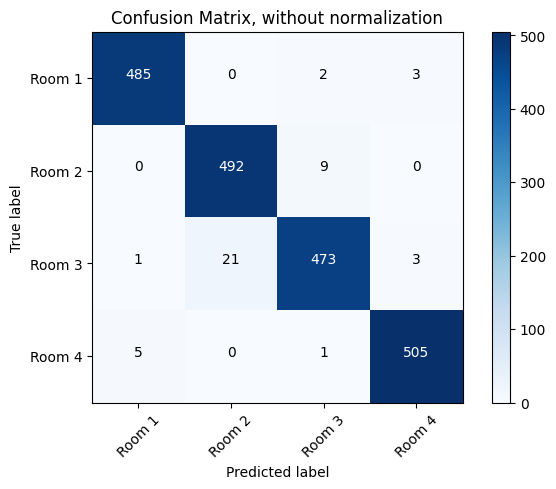



print the true lable with normalization: 


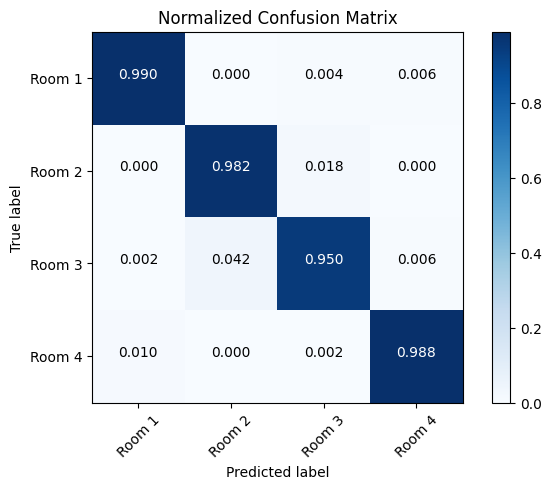



~~~~~~~~~~~~~~~~~ Average over all the test folds ~~~~~~~~~~~~~~~~~
Accuracy:  0.978
The precision of Room 1 class: 0.988
The precision of Room 2 class: 0.959
The precision of Room 3 class: 0.975
The precision of Room 4 class: 0.988
The recall of Room 1 class: 0.990
The recall of Room 2 class: 0.982
The recall of Room 3 class: 0.950
The recall of Room 4 class: 0.988
The f1-score of Room 1 class: 0.989
The f1-score of Room 2 class: 0.970
The f1-score of Room 3 class: 0.962
The f1-score of Room 4 class: 0.988


--------------------------------------------------------------------






In [ ]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~ CLEAN DATASET ~~~~~~~~~~~~~~~~~~~~~~~~~~\n')
training_and_validation(clean)

In [ ]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~ NOISE DATASET ~~~~~~~~~~~~~~~~~~~~~~~~~~\n')
training_and_validation(noise)

k_out  0
k_in  0
trained_accuracy 0.8
curr_accuracy 0.84
accuracy  0.84
trained depth:  18
pruned depth:  18
k_in  1
trained_accuracy 0.77
curr_accuracy 0.855
accuracy  0.855
trained depth:  17
pruned depth:  17
k_in  2
trained_accuracy 0.775
curr_accuracy 0.845
accuracy  0.855
trained depth:  19
pruned depth:  19
k_in  3
trained_accuracy 0.865
curr_accuracy 0.9
accuracy  0.9
trained depth:  15
pruned depth:  15
k_in  4
trained_accuracy 0.83
curr_accuracy 0.89
accuracy  0.9
trained depth:  18
pruned depth:  18
k_in  5
trained_accuracy 0.78
curr_accuracy 0.815
accuracy  0.9
trained depth:  16
pruned depth:  16
k_in  6
trained_accuracy 0.805
curr_accuracy 0.835
accuracy  0.9
trained depth:  17
pruned depth:  17
k_in  7
trained_accuracy 0.825
curr_accuracy 0.845
accuracy  0.9
trained depth:  17
pruned depth:  17
k_in  8
trained_accuracy 0.845
curr_accuracy 0.845
accuracy  0.9
trained depth:  15
pruned depth:  15
k_out  1
k_in  0
trained_accuracy 0.78
curr_accuracy 0.815
accuracy  0.9
trai